**STEP 1**: The installation, importation and upgrade of the needed libraries. This is important as there would be no code without these.

In [18]:
!pip install yfinance numpy pandas matplotlib

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**STEP 2**: The creation of an interface that allows for the input of the ticker symbol of the equity, start date of data collection and end date of data collection. The interface should address easy of changeability.

In [19]:
ticker = "AAPL"
start_date = "2021-01-01"
end_date = "2024-11-22"

data = yf.download(ticker, start=start_date, end=end_date)
print(data)

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2021-01-04 00:00:00+00:00  126.544212  129.410004  133.610001  126.760002   
2021-01-05 00:00:00+00:00  128.108765  131.009995  131.740005  128.429993   
2021-01-06 00:00:00+00:00  123.796455  126.599998  131.050003  126.379997   
2021-01-07 00:00:00+00:00  128.020782  130.919998  131.630005  127.860001   
2021-01-08 00:00:00+00:00  129.125732  132.050003  132.630005  130.229996   
...                               ...         ...         ...         ...   
2024-11-15 00:00:00+00:00  225.000000  225.000000  226.919998  224.270004   
2024-11-18 00:00:00+00:00  228.020004  228.020004  229.740005  225.169998   
2024-11-19 00:00:00+00:00  228.279999  228.279999  230.160004  226.660004   
2024-11-20 00:00:00+00:00  229.000000  229.000000  229.929993  225.889999   

**STEP 3**: Dropping of the columns that are not needed for this project. The needed columns for this project are DATE and CLOSE

In [20]:
data = data.drop(columns=["Adj Close", "Open", "High", "Low", "Volume"])
print(data)

Price                           Close
Ticker                           AAPL
Date                                 
2021-01-04 00:00:00+00:00  129.410004
2021-01-05 00:00:00+00:00  131.009995
2021-01-06 00:00:00+00:00  126.599998
2021-01-07 00:00:00+00:00  130.919998
2021-01-08 00:00:00+00:00  132.050003
...                               ...
2024-11-15 00:00:00+00:00  225.000000
2024-11-18 00:00:00+00:00  228.020004
2024-11-19 00:00:00+00:00  228.279999
2024-11-20 00:00:00+00:00  229.000000
2024-11-21 00:00:00+00:00  228.520004

[979 rows x 1 columns]


**STEP 4**: The computation of the simple moving average, the standard deviation, the upper band and the lower band. The standard deviation multiplier is 2 because it corresponds to the properties of a normal distribution, which makes it statistically significant for capturing market behavior. I'm using a window of 20 here because my view is a long-term view. You can use a shorter window (e.g., 5) if you are working with highly volatile markets or short-term trading strategies.

In [21]:
window = 20
std_multiplier = 2

data['SMA'] = data['Close'].rolling(window=window).mean()
data['StdDev'] = data['Close'].rolling(window=window).std()
data['Upper Band'] = data['SMA'] + (std_multiplier * data['StdDev'])
data['Lower Band'] = data['SMA'] - (std_multiplier * data['StdDev'])

print(data)

Price                           Close       SMA    StdDev  Upper Band  \
Ticker                           AAPL                                   
Date                                                                    
2021-01-04 00:00:00+00:00  129.410004       NaN       NaN         NaN   
2021-01-05 00:00:00+00:00  131.009995       NaN       NaN         NaN   
2021-01-06 00:00:00+00:00  126.599998       NaN       NaN         NaN   
2021-01-07 00:00:00+00:00  130.919998       NaN       NaN         NaN   
2021-01-08 00:00:00+00:00  132.050003       NaN       NaN         NaN   
...                               ...       ...       ...         ...   
2024-11-15 00:00:00+00:00  225.000000  228.0245  4.513753  237.052005   
2024-11-18 00:00:00+00:00  228.020004  227.6015  4.052493  235.706487   
2024-11-19 00:00:00+00:00  228.279999  227.2225  3.564563  234.351625   
2024-11-20 00:00:00+00:00  229.000000  227.1345  3.493654  234.121809   
2024-11-21 00:00:00+00:00  228.520004  227.0320  3.

**STEP 5**: Plotting of the chart

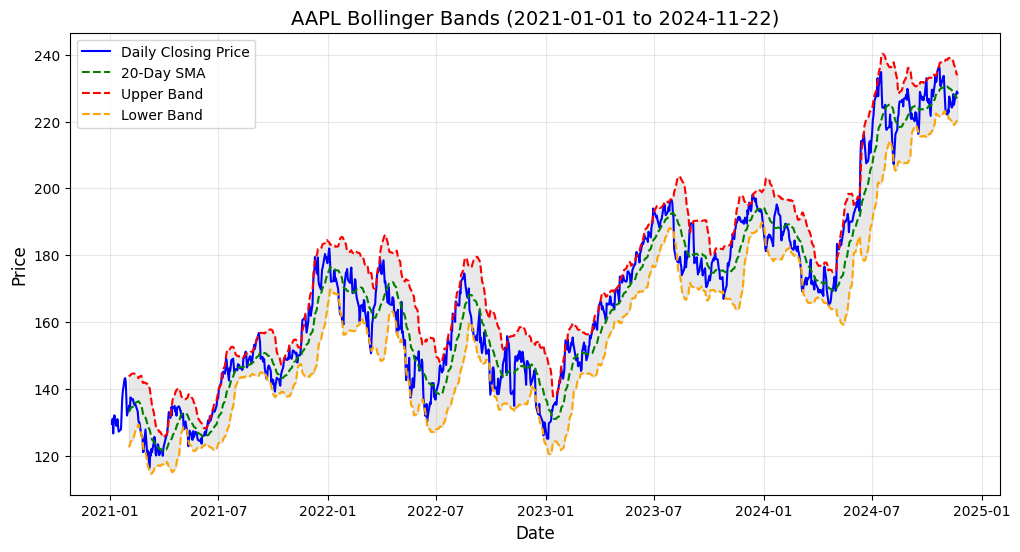

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Daily Closing Price', color='blue', linewidth=1.5)
plt.plot(data.index, data['SMA'], label=f'{window}-Day SMA', color='green', linestyle='--')
plt.plot(data.index, data['Upper Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(data.index, data['Lower Band'], label='Lower Band', color='orange', linestyle='--')

plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='lightgray', alpha=0.5)

plt.title(f'{ticker} Bollinger Bands ({start_date} to {end_date})', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(alpha=0.3)

plt.show()